<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_44_Ensemble_Learning_and_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Problem Statement

You have been provided with the Car details along with its price. Based on the given data, you need to predict the price of the Car.

# Defining the dataset

Link: https://drive.google.com/file/d/1iGan7AmcQXUtG8mBlB4ZZlyjWtefgWmq/view?usp=sharing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/CarPrice_Assignment.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA - Exploratory Data Analysis (DE, DM, DC, DV)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
df.isna().sum().sum()

0

In [14]:
df.duplicated().sum()

0

In [15]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [16]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
df.CarName.nunique()

147

In [18]:
df.CarName[0]

'alfa-romero giulia'

In [19]:
re.sub(' .*','',df.CarName[0])

'alfa-romero'

In [20]:
lis = []
for i in range(len(df)):
  brand_name = re.sub(' .*','',df.CarName[i])
  lis.append(brand_name)

print(lis)

['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', '

In [21]:
df['CarName'] = pd.DataFrame(lis)

In [22]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [23]:
df.CarName.nunique()

28

In [24]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [26]:
'''
'maxda' -> 'mazda'
'Nissan' -> 'nissan'
'porcshce' -> 'porsche'
"toyouta" -> "toyota"
"vokswagen" & "vw" -> "volkswagen"
'''

'\n\'maxda\' -> \'mazda\'\n\'Nissan\' -> \'nissan\'\n\'porcshce\' -> \'porsche\'\n"toyouta" -> "toyota"\n"vokswagen" & "vw" -> "volkswagen"\n'

In [27]:
df.CarName.replace(['maxda', 'Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'],
                   ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen'], inplace=True)

In [28]:
# 147 -> 28 -> 22

In [29]:
df.CarName.nunique()

22

In [30]:
df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

In [31]:
arr = df.CarName.value_counts()

def new_cat(x):
  if x in arr[arr<=10]:
    return 'other'
  else:
    return x

df.CarName = df.CarName.apply(new_cat)

In [32]:
df.CarName.value_counts()

other         66
toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
Name: CarName, dtype: int64

In [33]:
# 147 -> 28 -> 22 -> 10

In [34]:
df.CarName.replace(df.CarName.unique(),
                   [i for i in range(0,10)]).value_counts()

0    66
7    32
4    18
2    17
1    13
3    13
6    12
8    12
5    11
9    11
Name: CarName, dtype: int64

In [35]:
df.CarName.replace(df.CarName.unique(),
                   [i for i in range(0,10)], inplace=True)

In [36]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [37]:
df.drop('car_ID', axis=1, inplace=True)

In [38]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [39]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [40]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [41]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [42]:
df.fueltype.replace(df.fueltype.unique(),
                    [0,1],
                    inplace=True)

In [43]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [44]:
df.aspiration.replace(df.aspiration.unique(),
                    [0,1],
                    inplace=True)

In [45]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [46]:
df.doornumber.replace(df.doornumber.unique(),
                    [0,1],
                    inplace=True)

In [47]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [48]:
df.carbody.replace(df.carbody.unique(),
                    [0,1,2,3,4],
                    inplace=True)

In [49]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [50]:
df.drivewheel.replace(df.drivewheel.unique(),
                    [0,1,2],
                    inplace=True)

In [51]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [52]:
df.enginelocation.replace(df.enginelocation.unique(),
                    [0,1],
                    inplace=True)

In [53]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,0,1,0,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,1,2,1,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,1,2,2,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [55]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [56]:
df.enginetype.replace(df.enginetype.unique(),
                      [i for i in range(7)],
                      inplace=True)

In [57]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [58]:
df.cylindernumber.replace(df.cylindernumber.unique(),
                      [i for i in range(7)],
                      inplace=True)

In [59]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [60]:
df.fuelsystem.replace(df.fuelsystem.unique(),
                      [i for i in range(8)],
                      inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [62]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0


In [63]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.252842,-0.194311,-0.059866,-0.664073,-0.398970,0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.016678,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.252842,1.000000,0.138434,0.020034,0.226678,0.154844,-0.005379,-0.133909,0.125722,0.084858,...,-0.171060,-0.027614,0.137673,-0.153980,0.156484,-0.196466,-0.241545,0.134520,0.100684,-0.260668
fueltype,-0.194311,0.138434,1.000000,0.401397,0.191491,0.157580,-0.132257,-0.040070,0.308346,0.212679,...,0.069594,0.682404,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.020034,0.401397,1.000000,0.031792,0.021276,-0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.473355,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.226678,0.191491,0.031792,1.000000,0.447534,0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.017936,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.398970,0.154844,0.157580,0.021276,0.447534,1.000000,-0.056886,0.126546,0.368772,0.376842,...,0.172381,-0.054724,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,0.041671,-0.005379,-0.132257,-0.066465,0.098954,-0.056886,1.000000,-0.147865,-0.459745,-0.485649,...,-0.524307,0.036437,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.212471,-0.133909,-0.040070,-0.057191,-0.137757,0.126546,-0.147865,1.000000,-0.187790,-0.050989,...,0.196826,-0.082672,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.125722,0.308346,0.257611,0.447357,0.368772,-0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.004828,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.084858,0.212679,0.234539,0.398568,0.376842,-0.485649,-0.050989,0.874587,1.000000,...,0.683360,-0.090618,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<Axes: >

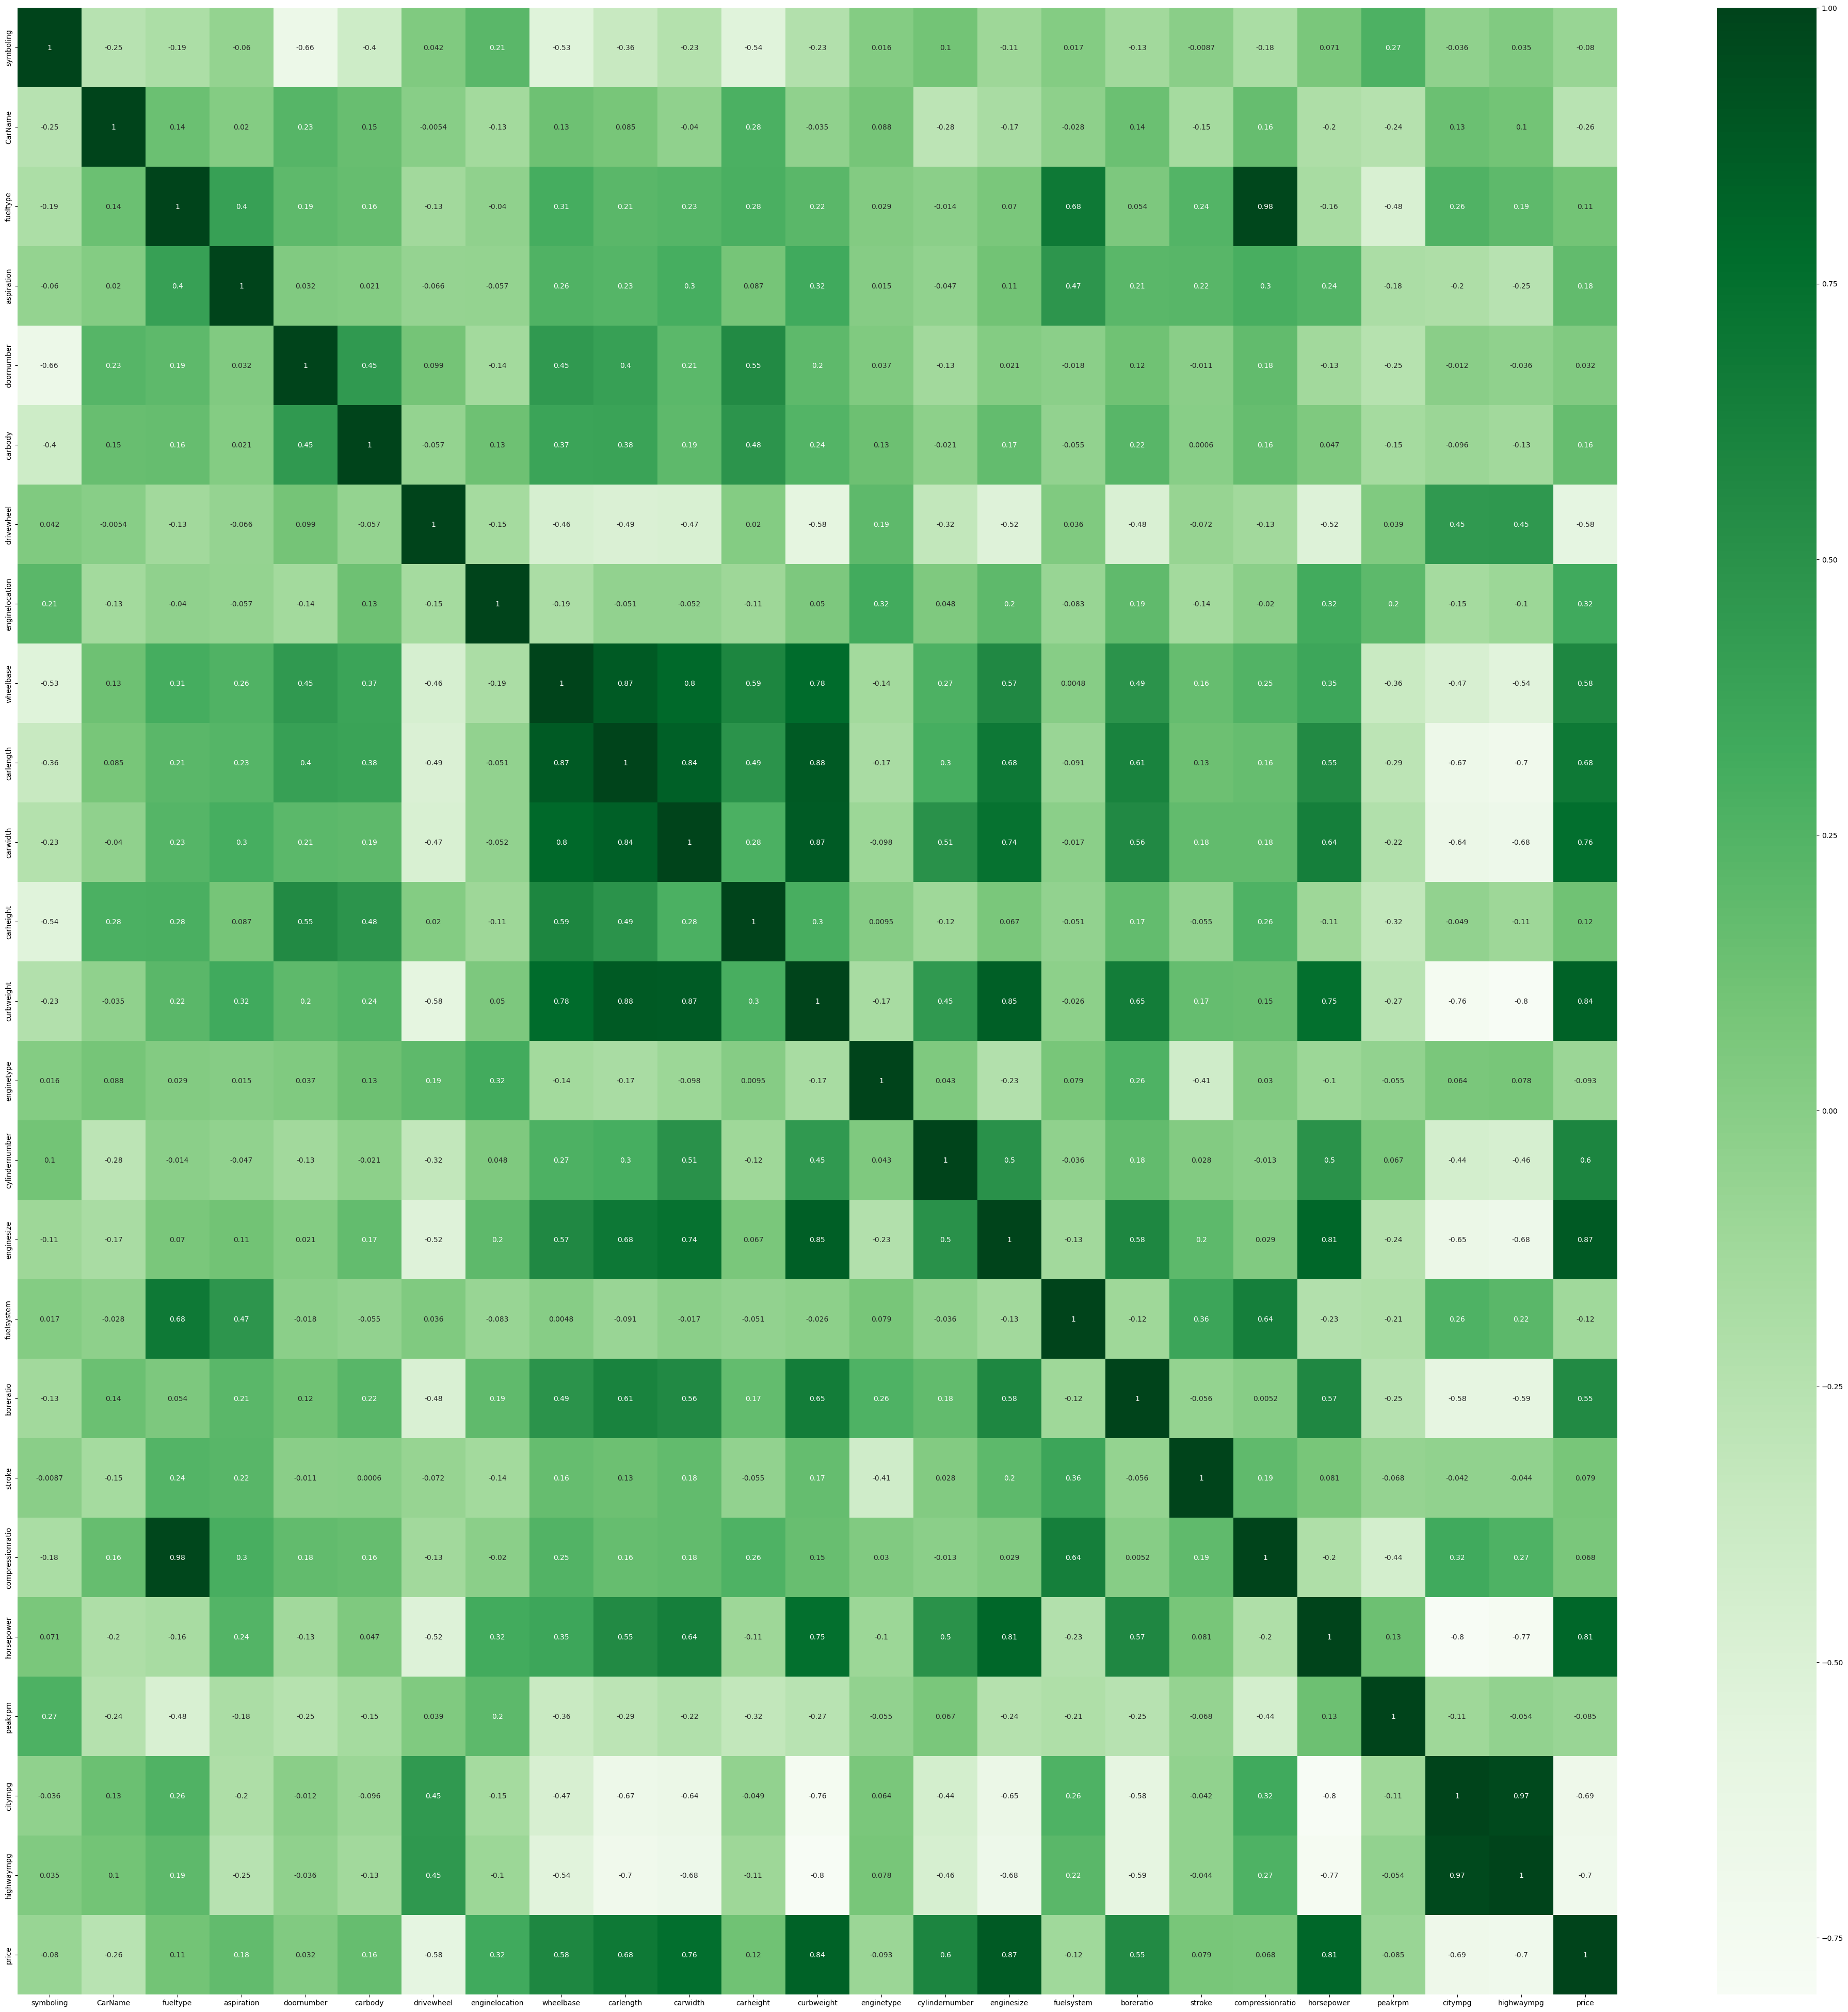

In [64]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [65]:
#sns.pairplot(df)

In [66]:
# 24(Features) + 1(Target)

# Seleting the Features and Target

In [67]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,0,1,0,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,1,2,1,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,1,2,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9,0,0,1,2,0,0,109.1,188.8,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,9,0,1,1,2,0,0,109.1,188.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,9,0,0,1,2,0,0,109.1,188.8,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,9,1,1,1,2,0,0,109.1,188.8,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [68]:
X = df.drop('price', axis=1)
y = df.price

In [69]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,0,0,1,0,0,94.5,171.2,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,0,1,2,1,0,99.8,176.6,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,0,1,2,2,0,99.4,176.6,...,2,136,0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9,0,0,1,2,0,0,109.1,188.8,...,0,141,0,3.78,3.15,9.5,114,5400,23,28
201,-1,9,0,1,1,2,0,0,109.1,188.8,...,0,141,0,3.78,3.15,8.7,160,5300,19,25
202,-1,9,0,0,1,2,0,0,109.1,188.8,...,1,173,0,3.58,2.87,8.8,134,5500,18,23
203,-1,9,1,1,1,2,0,0,109.1,188.8,...,1,145,6,3.01,3.40,23.0,106,4800,26,27


In [70]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Feature Selection (Feature Importance)

In [71]:
model = ExtraTreesRegressor()

In [72]:
model.fit(X,y)

ExtraTreesRegressor()

In [73]:
model.feature_importances_

array([0.00273358, 0.03351453, 0.00285103, 0.01052221, 0.0021171 ,
       0.00509048, 0.05929134, 0.0178763 , 0.01633698, 0.01504633,
       0.04937742, 0.00503764, 0.17815963, 0.0075641 , 0.07792011,
       0.20140561, 0.00627306, 0.01931391, 0.0050948 , 0.0044615 ,
       0.12855626, 0.01417319, 0.0672724 , 0.0700105 ])

* Top 10 features w.r.t. the Target

In [74]:
important_features = pd.Series(model.feature_importances_,
                               index = X.columns)

In [75]:
important_features

symboling           0.002734
CarName             0.033515
fueltype            0.002851
aspiration          0.010522
doornumber          0.002117
carbody             0.005090
drivewheel          0.059291
enginelocation      0.017876
wheelbase           0.016337
carlength           0.015046
carwidth            0.049377
carheight           0.005038
curbweight          0.178160
enginetype          0.007564
cylindernumber      0.077920
enginesize          0.201406
fuelsystem          0.006273
boreratio           0.019314
stroke              0.005095
compressionratio    0.004462
horsepower          0.128556
peakrpm             0.014173
citympg             0.067272
highwaympg          0.070010
dtype: float64

<Axes: >

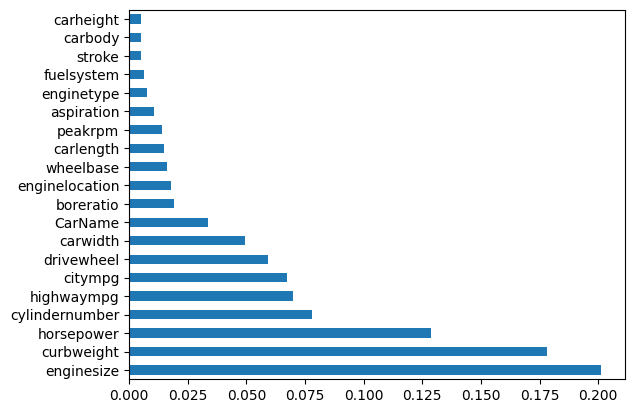

In [76]:
important_features.nlargest(20).plot(kind='barh')

In [77]:
important_features.nlargest(10)

enginesize        0.201406
curbweight        0.178160
horsepower        0.128556
cylindernumber    0.077920
highwaympg        0.070010
citympg           0.067272
drivewheel        0.059291
carwidth          0.049377
CarName           0.033515
boreratio         0.019314
dtype: float64

In [78]:
important_features.nlargest(10).index

Index(['enginesize', 'curbweight', 'horsepower', 'cylindernumber',
       'highwaympg', 'citympg', 'drivewheel', 'carwidth', 'CarName',
       'boreratio'],
      dtype='object')

In [79]:
asd = important_features.nlargest(10).index

In [80]:
list(asd)

['enginesize',
 'curbweight',
 'horsepower',
 'cylindernumber',
 'highwaympg',
 'citympg',
 'drivewheel',
 'carwidth',
 'CarName',
 'boreratio']

In [81]:
df[list(asd)]

,enginesize,curbweight,horsepower,cylindernumber,highwaympg,citympg,drivewheel,carwidth,CarName,boreratio
0,130,2548,111,0,27,21,0,64.1,0,3.47
1,130,2548,111,0,27,21,0,64.1,0,3.47
2,152,2823,154,1,26,19,0,65.5,0,2.68
3,109,2337,102,0,30,24,1,66.2,0,3.19
4,136,2824,115,2,22,18,2,66.4,0,3.19
...,...,...,...,...,...,...,...,...,...,...
200,141,2952,114,0,28,23,0,68.9,9,3.78
201,141,3049,160,0,25,19,0,68.8,9,3.78
202,173,3012,134,1,23,18,0,68.9,9,3.58
203,145,3217,106,1,27,26,0,68.9,9,3.01


In [82]:
X_new = df[list(asd)]

In [83]:
len(X_new)

205

In [84]:
X_new.shape

(205, 10)

# Choosing an appropriate model

In [85]:
model = RandomForestRegressor()

1. Performing the Hyper Parameter Tuning to get the best parametric value for the model using RandomizedSearchCV

In [86]:
# No. of trees in a random forest
n_estimators = [int(i) for i in range(100, 1201, 100)]

# No. of features to consider at every split
max_features = ['sqrt', 'auto']

# Maximun number of levels in a tree
max_depth = [i for i in np.linspace(start=5,stop=30,num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [87]:
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [88]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['sqrt', 'auto'],
 'max_depth': [5.0, 10.0, 15.0, 20.0, 25.0, 30.0],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [89]:
rf_random = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error',
                               n_jobs = 1,
                               random_state = 42,
                               verbose = 2,
                               cv = 5)

# Spliting the dataset into Training & Testing sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=42)

In [91]:
len(X_train)

174

In [92]:
len(X_test)

31

# Training the model

In [94]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10.0, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10.0, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10.0, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10.0, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10.0, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=15.0, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.0s
[CV] END max_depth=15.0, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.0s
[CV] END max_depth=15.0, max_features=auto, min_samples_leaf=2, min_samples_split

ValueError: ignored

In [95]:
rf_random.best_params_

AttributeError: ignored

# Testing Phase

In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
final_df = pd.DataFrame({"Actual": y_test,
                         "Predicted": y_pred})

In [ ]:
final_df

In [ ]:
final_df.corr()

In [ ]:
plt.scatter(y_test, y_pred)

# Performance Metric

In [ ]:
# With Hyperparameter tuning on 5 parameters
r2_score(y_test, y_pred)

In [ ]:
# Without Hyperparameter Tuning
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)
r2_score(y_test, rf_pred)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
r2_score(y_test, dt_pred)

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr_model = DecisionTreeRegressor()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
r2_score(y_test, lr_pred)

In [ ]:
RF - 96
DT - 94
LR - 93